<a href="https://colab.research.google.com/github/EricSiq/UnsupervisedMachineLearning/blob/main/UML_Multidimensional_Scaling__Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


In [8]:
#Loading breast cancer dataset
data=load_breast_cancer()
X=data.data#Features
Y=data.target#Labels Malignant or Benign
plt.show()

#Standardize the data(important for distance based methods)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [9]:

#Compute the pairwise distance
dist_matrix=pairwise_distances(X_scaled,metric='euclidean')

#Perform MDS with precomputed distance values in matrix , random state42 to fix randomness in algo
mds=MDS(n_components=2,metric=True,dissimilarity='precomputed',random_state=42)
X_mds=mds.fit_transform(dist_matrix)


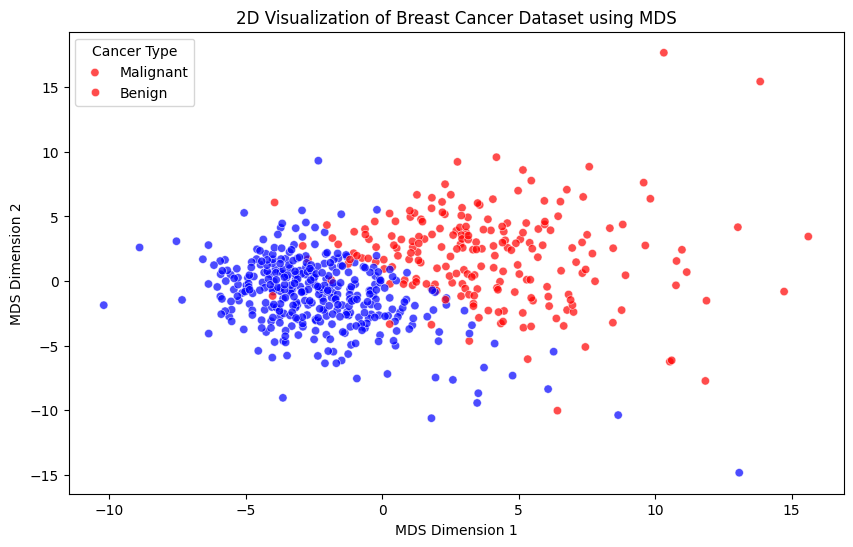

In [10]:
# Create Scatter plot for transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=Y, palette=['red', 'blue'], alpha=0.7)  # Removed '|'
plt.xlabel("MDS Dimension 1")  # Fixed spelling
plt.ylabel("MDS Dimension 2")  # Fixed spelling
plt.title("2D Visualization of Breast Cancer Dataset using MDS")
plt.legend(title="Cancer Type", labels=["Malignant", "Benign"])
plt.show()